## 유기동물 데이터를 이용한 입양률 예측

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics, preprocessing
from scipy.stats import itemfreq
import mglearn

C:\Users\Bit\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 1. Data Loading

In [2]:
#df4=pd.read_csv("D:\project_imsi\lostAnimal_20180101_20181231_vol3.csv", encoding="euc-kr")
#df3=pd.read_csv("D:\project_imsi\lostAnimal_20170101_20171231_vol3.csv", encoding="euc-kr")
#df2=pd.read_csv("D:\project_imsi\lostAnimal_20160101_20161231_vol3.csv", encoding="euc-kr")
df1=pd.read_csv("D:\KSA\project_imsi\lostAnimal_20150101_20151231_vol3.csv", encoding="euc-kr")


In [3]:
df1.tail(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(before),age(after),careAddr,careNm,careTel,chargeNm,colorCd,...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
79744,79744,79744,80455,2달추정(년생),0.0,경기도 수원시 팔달구 인계동 1135-7,정동물병원,031-239-7585,노선영,흑백,...,False,False,True,False,False,True,False,False,False,False


In [4]:
df1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'age(before)',
       'age(after)', 'careAddr', 'careNm', 'careTel', 'chargeNm', 'colorCd',
       'desertionNo', 'filename', 'happenDt', 'happenPlace', 'kindCd',
       'neuterYn', 'noticeComment', 'noticeEdt', 'noticeNo', 'noticeSdt',
       'officetel', 'orgNm', 'popfile', 'processState', 'sexCd', 'specialMark',
       'weight(before)', 'weight(after)', 'kind', 'breed', 'breed_Pre',
       'happenWd', 'happenMth', 'size', 'age_u', 'processState_Pre',
       'processState_C', 'processState_A', 'processState_D', 'processState_R',
       'processState_E', 'sexCd_M', 'sexCd_F', 'sexCd_Q', 'neuterYn_Y',
       'neuterYn_N', 'neuterYn_U', 'careNm_ETC', 'careNm_H', 'careNm_C',
       'careNm_O', 'careNm_AD', 'careNm_CM'],
      dtype='object')

### 2. Data PreProcessing

#### - 필요없는 컬럼 삭제

In [5]:
df = df1.drop(columns=['age(before)','careAddr', 'careNm', 'careTel', 'chargeNm',
                      'desertionNo', 'filename', 'happenDt', 'happenPlace', 'kindCd','noticeComment',
                       'noticeNo', 'noticeSdt','officetel', 'popfile', 'processState',
                       'weight(before)', 'specialMark','breed', 
                      ])
df.head(3)
#'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1',

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(after),colorCd,neuterYn,noticeEdt,orgNm,sexCd,weight(after),...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM
0,0,0,0,0.0,흰갈색,N,20160121,충청남도 공주시,F,6.0,...,False,False,True,False,False,True,False,False,False,False
1,1,1,1,4.0,흰색,N,20160114,전라남도 순천시,M,3.5,...,False,False,True,False,False,False,False,False,False,True
2,2,2,2,5.0,검/흰,U,20160118,인천광역시 미추홀구,F,5.0,...,False,False,False,True,False,False,False,False,True,False


In [6]:
print("사용할 컬럼 갯수 : ",len(df.columns))
print("컬럼 이름 : ", df.columns)

사용할 컬럼 갯수 :  34
컬럼 이름 :  Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'age(after)', 'colorCd',
       'neuterYn', 'noticeEdt', 'orgNm', 'sexCd', 'weight(after)', 'kind',
       'breed_Pre', 'happenWd', 'happenMth', 'size', 'age_u',
       'processState_Pre', 'processState_C', 'processState_A',
       'processState_D', 'processState_R', 'processState_E', 'sexCd_M',
       'sexCd_F', 'sexCd_Q', 'neuterYn_Y', 'neuterYn_N', 'neuterYn_U',
       'careNm_ETC', 'careNm_H', 'careNm_C', 'careNm_O', 'careNm_AD',
       'careNm_CM'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79745 entries, 0 to 79744
Data columns (total 34 columns):
Unnamed: 0          79745 non-null int64
Unnamed: 0.1        79745 non-null int64
Unnamed: 0.1.1      79745 non-null int64
age(after)          79745 non-null float64
colorCd             79745 non-null object
neuterYn            79745 non-null object
noticeEdt           79745 non-null int64
orgNm               79745 non-null object
sexCd               79745 non-null object
weight(after)       79533 non-null float64
kind                79745 non-null int64
breed_Pre           79737 non-null object
happenWd            79745 non-null object
happenMth           79745 non-null int64
size                79533 non-null object
age_u               79745 non-null object
processState_Pre    79745 non-null object
processState_C      79745 non-null bool
processState_A      79745 non-null bool
processState_D      79745 non-null bool
processState_R      79745 non-null bool
processState_E      7

#### - 결측치 처리

In [8]:
#print(df.isnull().sum()) # 결측치 수
#df.isnull().any()
#null_columns=df.columns[df.isnull().any()]
#df[null_columns].isnull().sum()
#print(df[df["breed_Pre"].isnull()][null_columns])        
print(df['weight(after)'].isnull().sum())       
print(df['size'].isnull().sum())                

212
212


In [9]:
# weight(after) : 나이별로 묶어서 중위값넣기
df["weight(after)"].fillna(df.groupby("age_u")["weight(after)"].transform("median"), inplace=True)
df.loc[pd.isnull(df["weight(after)"])]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(after),colorCd,neuterYn,noticeEdt,orgNm,sexCd,weight(after),...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM


In [10]:
# size : 몸무게가 비어서 전처리 되지 않은 행 재전처리
df.loc[df['weight(after)'] <= 3, 'size'] = '초소형'
df.loc[(df['weight(after)'] > 3 ) & (df['weight(after)'] <=9 ), 'size'] = '소형'
df.loc[(df['weight(after)'] > 9 ) & (df['weight(after)'] <=25 ), 'size'] = '중형'
df.loc[df['weight(after)'] > 25, 'size'] = '대형'

df.loc[pd.isnull(df["size"])]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(after),colorCd,neuterYn,noticeEdt,orgNm,sexCd,weight(after),...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM


In [11]:
# 동물 종 : 몇개 안되니 기타로 입력
df['breed_Pre'].fillna("기타",inplace=True)
df.loc[pd.isnull(df["breed_Pre"])]

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(after),colorCd,neuterYn,noticeEdt,orgNm,sexCd,weight(after),...,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM


In [12]:
df.isnull().sum()

Unnamed: 0          0
Unnamed: 0.1        0
Unnamed: 0.1.1      0
age(after)          0
colorCd             0
neuterYn            0
noticeEdt           0
orgNm               0
sexCd               0
weight(after)       0
kind                0
breed_Pre           0
happenWd            0
happenMth           0
size                0
age_u               0
processState_Pre    0
processState_C      0
processState_A      0
processState_D      0
processState_R      0
processState_E      0
sexCd_M             0
sexCd_F             0
sexCd_Q             0
neuterYn_Y          0
neuterYn_N          0
neuterYn_U          0
careNm_ETC          0
careNm_H            0
careNm_C            0
careNm_O            0
careNm_AD           0
careNm_CM           0
dtype: int64

#### - colorCd : 대표적 색상으로 분류

#### - neuterYn : 문자 -> 숫자

In [13]:
neuter_mapping = {"Y":0,"N":1,"U":2}
df['neuterYn'] = df['neuterYn'].map(neuter_mapping)
df.neuterYn[1:3]

1    1
2    2
Name: neuterYn, dtype: int64

#### - sexCd : 문자 -> 숫자

In [14]:
sex_mapping = {"M":0,"F":1,"Q":2}
df['sexCd'] = df['sexCd'].map(sex_mapping)
df.sexCd[1:3]

1    0
2    1
Name: sexCd, dtype: int64

#### - orgNm(담당지역주소) : 두분류로 나눈뒤, 숫자 mapping

In [15]:
df['sido'] = df['orgNm'].str.split(" ").str[0]
df['sido'].value_counts()

경기도        19300
서울특별시       8859
부산광역시       6937
경상남도        5581
인천광역시       5195
충청남도        4558
강원도         3559
대구광역시       3414
전라북도        3299
경상북도        3259
대전광역시       3158
울산광역시       2986
충청북도        2955
전라남도        2943
제주특별자치도     1775
광주광역시       1683
세종특별자치시      284
Name: sido, dtype: int64

In [16]:
sido_mapping = {"경기도":0,"서울특별시":1,"부산광역시":2,"경상남도":3,
                "인천광역시":4,"충청남도":5,"강원도":6,"대구광역시":7,
                "전라북도":8,"경상북도":9,"대전광역시":10,"울산광역시":11,
                "충청북도":12,"전라남도":13,"제주특별자치도":14,"광주광역시":15,
                "세종특별자치시":16
}
df['sido'] = df['sido'].map(sido_mapping)
df['sido'].head(3)

0     5
1    13
2     4
Name: sido, dtype: int64

#### - breed_Pre(유기동물종류) : 

#### - happenWd(발견요일) : 문자 -> 숫자 mapping 

In [17]:
week_mapping = {"Monday":0, "Tuesday":2, "Wednesday":3, 
                "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
df['happenWd'] = df['happenWd'].map(week_mapping)
df.tail(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(after),colorCd,neuterYn,noticeEdt,orgNm,sexCd,weight(after),...,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM,sido
79742,79742,79742,80453,3.0,갈색,1,20150112,경기도 평택시,0,5.7,...,False,True,False,False,False,True,False,False,False,0
79743,79743,79743,80454,12.0,갈색 백색,2,20150112,경기도 성남시,1,5.5,...,False,False,True,False,True,False,False,False,False,0
79744,79744,79744,80455,0.0,흑백,1,20150108,경기도 수원시,0,0.2,...,False,True,False,False,True,False,False,False,False,0


#### - size : 문자 -> 숫자 mapping

In [18]:
df['size'].fillna('중형',inplace=True)
size_mapping = {"대형":0,"소형":1,"중형":2,"초소형":3}
df['size'] = df['size'].map(size_mapping)

df.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(after),colorCd,neuterYn,noticeEdt,orgNm,sexCd,weight(after),...,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM,sido
0,0,0,0,0.0,흰갈색,1,20160121,충청남도 공주시,1,6.0,...,False,True,False,False,True,False,False,False,False,5
1,1,1,1,4.0,흰색,1,20160114,전라남도 순천시,0,3.5,...,False,True,False,False,False,False,False,False,True,13
2,2,2,2,5.0,검/흰,2,20160118,인천광역시 미추홀구,1,5.0,...,False,False,True,False,False,False,False,True,False,4


#### - age : 문자 -> 숫자 mapping 

In [19]:
age_mapping = {"노견기":0,"성견기":1,"유견기":2}
df['age_u'] = df['age_u'].map(age_mapping)

df.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(after),colorCd,neuterYn,noticeEdt,orgNm,sexCd,weight(after),...,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM,sido
0,0,0,0,0.0,흰갈색,1,20160121,충청남도 공주시,1,6.0,...,False,True,False,False,True,False,False,False,False,5
1,1,1,1,4.0,흰색,1,20160114,전라남도 순천시,0,3.5,...,False,True,False,False,False,False,False,False,True,13


#### - processState_Pre : 문자 -> 숫자 mapping 

In [20]:
proc_mapping = {"C":0, "A":1, "D":2, "R":3, "E":4}
df['processState_Pre'] = df['processState_Pre'].map(proc_mapping)

df.head(2)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(after),colorCd,neuterYn,noticeEdt,orgNm,sexCd,weight(after),...,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM,sido
0,0,0,0,0.0,흰갈색,1,20160121,충청남도 공주시,1,6.0,...,False,True,False,False,True,False,False,False,False,5
1,1,1,1,4.0,흰색,1,20160114,전라남도 순천시,0,3.5,...,False,True,False,False,False,False,False,False,True,13


In [21]:
df.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(after),colorCd,neuterYn,noticeEdt,orgNm,sexCd,weight(after),...,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM,sido
0,0,0,0,0.0,흰갈색,1,20160121,충청남도 공주시,1,6.0,...,False,True,False,False,True,False,False,False,False,5


#### - DataFrame 분류 : 개, 고양이, 기타

In [22]:
#개:0, 고양이:1, 기타:2
dfd = df[df.kind==0]
dfc = df[df.kind==1]
dfe = df[df.kind==2]

print(dfd['kind'].value_counts())
print(dfc['kind'].value_counts())
print(dfe['kind'].value_counts())

0    58220
Name: kind, dtype: int64
1    20602
Name: kind, dtype: int64
2    923
Name: kind, dtype: int64


### 3. Data Statistical Analysis

In [23]:
dfd.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,age(after),neuterYn,noticeEdt,sexCd,weight(after),kind,happenWd,happenMth,size,age_u,processState_Pre,sido
count,58220.000000,58220.000000,58220.000000,58220.000000,58220.000000,5.822000e+04,58220.000000,58220.000000,58220.0,58220.000000,58220.000000,58220.000000,58220.000000,58220.000000,58220.000000
mean,40436.160082,40436.160082,40763.447836,3.273081,1.232034,2.015063e+07,0.459756,6.465534,0.0,3.095843,6.610924,1.793748,1.265871,1.782274,4.869100
std,23762.190205,23762.190205,23967.435324,3.210152,0.586502,7.463259e+04,0.512720,6.466394,0.0,2.139588,3.290419,0.930828,0.583818,0.783095,4.675795
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.150604e+06,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,19622.750000,19622.750000,19777.750000,1.000000,1.000000,2.015042e+07,0.000000,3.000000,0.0,2.000000,4.000000,1.000000,1.000000,1.000000,1.000000
50%,40056.000000,40056.000000,40358.000000,3.000000,1.000000,2.015072e+07,0.000000,4.000000,0.0,3.000000,7.000000,1.000000,1.000000,2.000000,3.000000
75%,62202.250000,62202.250000,62713.250000,5.000000,2.000000,2.015101e+07,1.000000,7.000000,0.0,5.000000,9.000000,3.000000,2.000000,2.000000,9.000000
max,79743.000000,79743.000000,80454.000000,50.000000,2.000000,2.051113e+07,2.000000,80.000000,0.0,7.000000,12.000000,3.000000,2.000000,4.000000,16.000000


In [24]:
dfd.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'age(after)', 'colorCd',
       'neuterYn', 'noticeEdt', 'orgNm', 'sexCd', 'weight(after)', 'kind',
       'breed_Pre', 'happenWd', 'happenMth', 'size', 'age_u',
       'processState_Pre', 'processState_C', 'processState_A',
       'processState_D', 'processState_R', 'processState_E', 'sexCd_M',
       'sexCd_F', 'sexCd_Q', 'neuterYn_Y', 'neuterYn_N', 'neuterYn_U',
       'careNm_ETC', 'careNm_H', 'careNm_C', 'careNm_O', 'careNm_AD',
       'careNm_CM', 'sido'],
      dtype='object')

In [25]:
# processState와 상관관계
cor_t = np.round(dfd.corr(),3)
cor1 = cor_t.loc[:,[ 'processState_Pre', 'processState_C', 'processState_A',
       'processState_D', 'processState_R', 'processState_E']]
cor1

,processState_Pre,processState_C,processState_A,processState_D,processState_R,processState_E
Unnamed: 0,-0.014,-0.057,0.048,-0.025,-0.009,-0.003
Unnamed: 0.1,-0.014,-0.057,0.048,-0.025,-0.009,-0.003
Unnamed: 0.1.1,-0.014,-0.057,0.048,-0.025,-0.009,-0.003
age(after),0.208,-0.007,-0.223,0.115,0.132,-0.004
neuterYn,-0.003,-0.033,-0.033,0.098,-0.068,-0.009
noticeEdt,0.004,0.001,-0.005,0.004,0.002,0.000
sexCd,-0.006,-0.004,-0.003,0.020,-0.020,0.001
weight(after),0.079,-0.017,-0.024,-0.063,0.112,0.008
kind,NaN,NaN,NaN,NaN,NaN,NaN
happenWd,0.018,0.013,-0.010,-0.019,0.031,0.003


### 4. Data Learning

In [ ]:
# null값 처리
# df.isnull().any()
#null_columns=df.columns[df.isnull().any()]
#df[null_columns].isnull().sum()
#print(df[df["breed_Pre"].isnull()][null_columns])

#### - feature 선택

In [26]:
# feature_name = ['age(after)','neuterYn','sexCd','weight(after)', 'kind', 'happenWd', 'happenMth', 
#                 'size', 'processState_Pre', 'sido']
# df_Pre = df[feature_name]

# feature_name2 = ['age(after)','neuterYn','sexCd','weight(after)', 'kind', 'happenWd', 'happenMth', 
#                 'size', 'processState_A', 'sido']
# df_A = df[feature_name2]

# df_Pre.head(3)
# #df_A.head(3)

,age(after),neuterYn,sexCd,weight(after),kind,happenWd,happenMth,size,processState_Pre,sido
0,0.0,1,1,6.0,0,4,12,1,2,5
1,4.0,1,0,3.5,0,4,12,1,1,13
2,5.0,2,1,5.0,0,4,12,1,4,4


In [59]:
feature_name = ['kind', 'happenWd', 'happenMth','size','age_u', 'sexCd_M',
               'sexCd_F', 'sexCd_Q', 'neuterYn_Y', 'neuterYn_N', 'neuterYn_U',
               'careNm_ETC', 'careNm_H', 'careNm_C', 'careNm_O', 'careNm_AD',
               'careNm_CM', 'sido','processState_Pre', 'sido']

df_Pre = dfd[feature_name]

feature_name2 = ['kind', 'happenWd', 'happenMth','size','age_u', 'sexCd_M',
               'sexCd_F', 'sexCd_Q', 'neuterYn_Y', 'neuterYn_N', 'neuterYn_U',
               'careNm_ETC', 'careNm_H', 'careNm_C', 'careNm_O', 'careNm_AD',
               'careNm_CM', 'sido','processState_A', 'sido']
df_A = dfd[feature_name2]

df_Pre.head(3)
df_A.head(3)

,kind,happenWd,happenMth,size,age_u,sexCd_M,sexCd_F,sexCd_Q,neuterYn_Y,neuterYn_N,neuterYn_U,careNm_ETC,careNm_H,careNm_C,careNm_O,careNm_AD,careNm_CM,sido,processState_A,sido
0,0,4,12,1,2,False,True,False,False,True,False,False,True,False,False,False,False,5,False,5
1,0,4,12,1,1,True,False,False,False,True,False,False,False,False,False,False,True,13,True,13
2,0,4,12,1,1,False,True,False,False,False,True,False,False,False,False,True,False,4,False,4


#### - 종속변수 독립변수 추출

###### 1) processState_Pre 기준

In [60]:
X=np.array(df_Pre.drop(columns='processState_Pre')) #종속변수
Y=np.array(df_Pre.processState_Pre) #독립변수

2    23382
1    22059
3    11571
0     1151
4       57
Name: processState_Pre, dtype: int64


C:\Users\Bit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


array([ 1151, 22059, 23382, 11571,    57], dtype=int64)

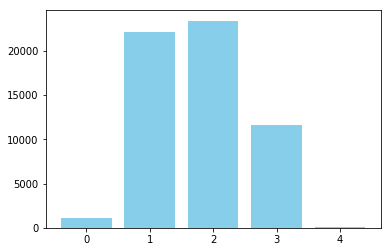

In [61]:
print(df_Pre['processState_Pre'].value_counts())
table = itemfreq(Y)
x_ticks = ['0','1','2','3','4'] 
# 0 : 보호중, 1:입양,기증, 2:자연사,안락사, 3:반환, 4:방사,미포획
plt.bar(x_ticks, table[:,1], color='skyblue')
table[:,1]

###### 2) processState_A 기준

In [62]:
Z=np.array(df_A.drop(columns='processState_A')) #종속변수
Q=np.array(df_A.processState_A) #독립변수

False    36161
True     22059
Name: processState_A, dtype: int64


C:\Users\Bit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  


array([36161, 22059], dtype=int64)

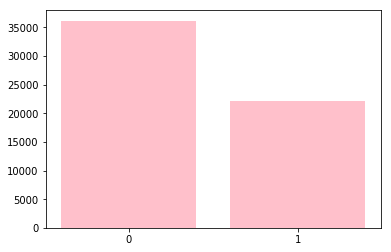

In [63]:
print(df_A['processState_A'].value_counts())
table = itemfreq(Q)
x_ticks = ['0','1'] # 0 : 입양X, 1:입양O
plt.bar(x_ticks, table[:,1], color='pink')
table[:,1]

##### - 데이터셋 나누기

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=5)
Z_train, Z_test, Q_train, Q_test = train_test_split(Z,Q,test_size=0.3, random_state=5)

# train_test_split
# : 데이터를  train set과 test set으로 단순분리
# : 원래 트레이닝 데이터와 결과값이 X와 Y를 무작위로 섞은 후 test_size로 주어진 비율만큼 나눔
# test_size 0.3은 X와 Y를 무작위로 섞은 후에 70%은 train으로, 30%는 test로 하는것
# random_state : 난수발생을 위한 seed의 인자값

In [65]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(40754, 19)
(17466, 19)
(40754,)
(17466,)


In [66]:
print(Z_train.shape)
print(Z_test.shape)
print(Q_train.shape)
print(Q_test.shape)

(40754, 19)
(17466, 19)
(40754,)
(17466,)


#### - 모형 적용

##### KNN

In [34]:
# knn객체 : 훈련데이터로 모델을 만들고 새로운 데이터포인트에 대해 예측하는 알고리즘을 캡슐화
# 또한 알고리즘이 훈련데이터로부터 추출한 정보를 담고 있음
# KNeighborsClassifier : 훈련데이터 자체를 저장
knn_Pre = KNeighborsClassifier(n_neighbors=1) # n_neighbor : 이웃의 갯수
knn_A = KNeighborsClassifier(n_neighbors=1) # n_neighbor : 이웃의 갯수
print(knn_Pre)
print(knn_A)
# fit() : 훈련데이터셋으로부터 모델 만들기, knn객체 자체를 반환, 그리고 knn객체 자체를 변경시킴, knn객체가 문자열 형태로 출력됨
#출력에서 모델으르생성할떄 사용한 매개변수 확인 가능
# 훈련데이터(Numpy배열 X_train), 훈련데이터레이블(Numpy배열 y_train)을 매개변수로 받음
knn_Pre.fit(X_train, Y_train)
knn_A.fit(Z_train,Q_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

##### Logistic Regression

In [35]:
glm_Pre = LogisticRegression()
glm_A = LogisticRegression()

glm_Pre.fit(X_train, Y_train)
glm_A.fit(Z_train, Q_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Naive Bayes

In [36]:
GNB_Pre = GaussianNB()
GNB_A = GaussianNB()
print(GNB_Pre)
print(GNB_A)

GNB_Pre.fit(X_train, Y_train)
GNB_A.fit(Z_train, Q_train) 

GaussianNB(priors=None)
GaussianNB(priors=None)


GaussianNB(priors=None)

##### Tree

In [37]:
depth_grid = np.arange(2,31,2)
parameters = {'max_depth':depth_grid}

gridCV_Pre = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)
gridCV_A = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)

gridCV_Pre.fit(X_train, Y_train);
gridCV_A.fit(Z_train, Q_train);

best_depth_Pre = gridCV_Pre.best_params_['max_depth']
best_depth_A = gridCV_A.best_params_['max_depth']

print("Tree best depth : " + str(best_depth_Pre))
print("Tree best depth : " + str(best_depth_A))

Tree best depth : 10
Tree best depth : 8


In [38]:
DTC_best_Pre = DecisionTreeClassifier(max_depth=best_depth_Pre)
DTC_best_A = DecisionTreeClassifier(max_depth=best_depth_A)

DTC_best_Pre.fit(X_train, Y_train);
DTC_best_A.fit(Z_train, Q_train);

##### Random Forest

In [67]:
estimator_grid = np.arange(1, 30, 5)
depth_grid = np.arange(1, 10, 2)
parameters = {'n_estimators': estimator_grid, 'max_depth': depth_grid}

gridCV_Pre = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10)
gridCV_A = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10)

gridCV_Pre.fit(X_train, Y_train);
gridCV_A.fit(Z_train, Q_train);

best_n_estim_Pre = gridCV_Pre.best_params_['n_estimators']
best_depth_Pre = gridCV_Pre.best_params_['max_depth']

best_n_estim_A = gridCV_A.best_params_['n_estimators']
best_depth_A = gridCV_A.best_params_['max_depth']

In [68]:
print("Random Forest best n estimator : " + str(best_n_estim_Pre))
print("Random Forest best depth : " + str(best_depth_Pre))

print("Random Forest best n estimator : " + str(best_n_estim_A))
print("Random Forest best depth : " + str(best_depth_A))

Random Forest best n estimator : 26
Random Forest best depth : 9
Random Forest best n estimator : 16
Random Forest best depth : 9


In [69]:
RF_best_Pre = RandomForestClassifier(max_depth=best_depth_Pre,n_estimators=best_n_estim_Pre,random_state=3)
RF_best_A = RandomForestClassifier(max_depth=best_depth_A,n_estimators=best_n_estim_A,random_state=3)

RF_best_Pre.fit(X_train, Y_train);
RF_best_A.fit(Z_train, Q_train);

##### AdaBoost

In [ ]:
estimator_grid = np.arange(30, 80, 10)
learning_rate_grid = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
parameters = {'n_estimators': estimator_grid, 'learning_rate': learning_rate_grid}

gridCV_Pre = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, cv=10)
gridCV_A = GridSearchCV(AdaBoostClassifier(), param_grid=parameters, cv=10)

gridCV_Pre.fit(X_train, Y_train)
gridCV_A.fit(Z_train, Q_train)

best_n_estim_Pre = gridCV_Pre.best_params_['n_estimators']
best_learn_rate_Pre = gridCV_Pre.best_params_['learning_rate']

best_n_estim_A = gridCV_A.best_params_['n_estimators']
best_learn_rate_A = gridCV_A.best_params_['learning_rate']

In [ ]:
print("Ada Boost best n estimator : " + str(best_n_estim_Pre))
print("Ada Boost best learning rate : " + str(best_learn_rate_Pre))

print("Ada Boost best n estimator : " + str(best_n_estim_A))
print("Ada Boost best learning rate : " + str(best_learn_rate_A))

In [ ]:
AB_best_Pre = AdaBoostClassifier(n_estimators=best_n_estim_Pre,learning_rate=best_learn_rate_Pre,random_state=3)
AB_best_A = AdaBoostClassifier(n_estimators=best_n_estim_A,learning_rate=best_learn_rate_A,random_state=3)

AB_best_Pre.fit(X_train, Y_train);
AB_best_A.fit(Z_train, Q_train);

##### SVM (Support Vector Machine)

In [ ]:
C_grid = [0.001, 0.01, 0.1, 1, 10]
gamma_grid = [0.001, 0.01, 0.1, 1]
parameters = {'C': C_grid, 'gamma' : gamma_grid}

gridCV_Pre = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10);
gridCV_Pre.fit(X_train, Y_train)

gridCV_A = GridSearchCV(SVC(kernel='rbf'), parameters, cv=10);
gridCV_A.fit(Z_train, Q_train)


best_C_Pre = gridCV_Pre.best_params_['C']
best_gamma_Pre = gridCV_Pre.best_params_['gamma']

best_C_A = gridCV_A.best_params_['C']
best_gamma_A = gridCV_A.best_params_['gamma']

In [ ]:
print("SVM best C : " + str(best_C_Pre))
print("SVM best gamma : " + str(best_gamma_Pre))

print("SVM best C : " + str(best_C_A))
print("SVM best gamma : " + str(best_gamma_A))

In [ ]:
SVM_best_Pre = SVC(C=best_C_Pre,gamma=best_gamma_Pre)
SVM_best_Pre.fit(X_train, Y_train);

SVM_best_A = SVC(C=best_C_A,gamma=best_gamma_A)
SVM_best_A.fit(Z_train, Q_train);

#### - 예측 및 검증

In [42]:
# X_new = np.array([[5,1,0,4.5,0,1,11,2,12]])
# Z_new = np.array([[5,1,0,4.5,0,1,11,2,12]])
# print("X_new.shape : {}".format(X_new.shape))
# print("Z_new.shape : {}".format(Z_new.shape))

X_new.shape : (1, 9)
Z_new.shape : (1, 9)


In [70]:
X_new = np.array([[0,3,11,2,1,0,0,1,1,0,0,0,0,0,1,0,0,4,3]])
Z_new = np.array([[0,3,11,2,1,0,0,1,1,0,0,0,0,0,1,0,0,4,3]])
print("X_new.shape : {}".format(X_new.shape))
print("Z_new.shape : {}".format(Z_new.shape))

X_new.shape : (1, 19)
Z_new.shape : (1, 19)


In [71]:
target_Pre = {0:'보호중', 1:'입양기증', 2:'자연사안락사', 3:'반환', 4:'방사미포획'}
target_A = {0:'입양X', 1:'입양O'}

##### KNN

In [44]:
prediction_Pre = knn_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = knn_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

예측:[3]
예측한 타깃의 이름 : 반환
예측:[False]
예측한 타깃의 이름 : 입양X


In [45]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred = knn_Pre.predict(X_test) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = knn_A.predict(Z_test) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

테스트 셋에 대한 예측값: [1 2 2 ... 3 3 1]
테스트 셋에 대한 예측값: [ True False False ... False False  True]


In [46]:
print( "KNN best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))
print( "KNN best accuracy : " + str(np.round(metrics.accuracy_score(Q_test,Q_pred),3)))

KNN best accuracy : 0.468
KNN best accuracy : 0.606


##### Logistic Regression

In [47]:
prediction_Pre = glm_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = glm_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

예측:[2]
예측한 타깃의 이름 : 자연사안락사
예측:[False]
예측한 타깃의 이름 : 입양X


In [48]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred = glm_Pre.predict(X_test) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = glm_A.predict(Z_test) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

테스트 셋에 대한 예측값: [2 1 1 ... 1 2 1]
테스트 셋에 대한 예측값: [False False False ... False False False]


In [49]:
print( "Logistic Regression best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))
print( "Logistic Regression best accuracy : " + str(np.round(metrics.accuracy_score(Q_test,Q_pred),3)))

Logistic Regression best accuracy : 0.501
Logistic Regression best accuracy : 0.644


##### Naive Bayes

In [50]:
prediction_Pre = GNB_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = GNB_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

예측:[2]
예측한 타깃의 이름 : 자연사안락사
예측:[False]
예측한 타깃의 이름 : 입양X


In [51]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred = GNB_Pre.predict(X_test) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = GNB_A.predict(Z_test) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

테스트 셋에 대한 예측값: [1 1 1 ... 1 1 3]
테스트 셋에 대한 예측값: [False False False ... False False False]


In [52]:
print( "Naive Bayes best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))
print( "Naive Bayes best accuracy : " + str(np.round(metrics.accuracy_score(Q_test,Q_pred),3)))

Naive Bayes best accuracy : 0.443
Naive Bayes best accuracy : 0.637


##### Tree

In [53]:
prediction_Pre = DTC_best_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = DTC_best_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

예측:[2]
예측한 타깃의 이름 : 자연사안락사
예측:[False]
예측한 타깃의 이름 : 입양X


In [54]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred = DTC_best_Pre.predict(X_test) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = DTC_best_A.predict(Z_test) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

테스트 셋에 대한 예측값: [1 1 1 ... 2 2 1]
테스트 셋에 대한 예측값: [False  True False ... False False False]


In [55]:
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(Q_test,Q_pred),3)))

Tree best accuracy : 0.526
Tree best accuracy : 0.658


##### Random Forest

In [72]:
prediction_Pre = RF_best_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = RF_best_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

예측:[1]
예측한 타깃의 이름 : 입양기증
예측:[False]
예측한 타깃의 이름 : 입양X


In [73]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred =RF_best_Pre.predict(X_test) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = RF_best_A.predict(Z_test) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

테스트 셋에 대한 예측값: [1 2 1 ... 2 1 1]
테스트 셋에 대한 예측값: [False False False ... False False  True]


In [74]:
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Q_test,Q_pred),3)))

Random Forest best accuracy : 0.51
Random Forest best accuracy : 0.661


##### AdaBoost

In [ ]:
prediction_Pre = AB_best_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = AB_best_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

In [ ]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred =AB_best_Pre.predict(X_test) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Q_pred = AB_best_A.predict(Z_test) 
print("테스트 셋에 대한 예측값: {}".format(Q_pred))

In [ ]:
print( "Ada Boost best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))
print( "Ada Boost best accuracy : " + str(np.round(metrics.accuracy_score(Q_test,Q_pred),3)))

##### SVM (Support Vector Machine)

In [ ]:
prediction_Pre = SVM_best_Pre.predict(X_new)
print("예측:{}".format(prediction_Pre))
p_Pre = int(prediction_Pre)
print("예측한 타깃의 이름 : {}".format(target_Pre[p_Pre]))

prediction_A = SVM_best_A.predict(X_new)
print("예측:{}".format(prediction_A))
p_A = int(prediction_A)
print("예측한 타깃의 이름 : {}".format(target_A[p_A]))

In [ ]:
#테스트데이터 사용 (모델을 만들때 사용하지 않았고, 테스트셋에 있는 각 붓꽃의 품종을 정확히 알고있음)
Y_pred = SVM_best_Pre.predict(X_test) 
print("테스트 셋에 대한 예측값: {}".format(Y_pred))

Z_pred = SVM_best_A.predict(Z_test) 
print("테스트 셋에 대한 예측값: {}".format(Z_pred))

In [ ]:
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))
print( "SVM best accuracy : " + str(np.round(metrics.accuracy_score(Z_test,Z_pred),3)))

##### - 검증2

In [ ]:
# 예측값 y_pred와 기존의 정답인 y_test가 맞는지 확인
print("테스트 셋에 대한 정확도 : {:.2f}".format(np.mean(Y_pred == Y_test)))
print("테스트 셋에 대한 정확도 : {:.2f}".format(np.mean(Z_pred == Z_test)))

In [ ]:
print("테스트 셋트에 대한 정확도 : {:.2f}".format(knn_Pre.score(X_test, Y_test)))
print("테스트 셋트에 대한 정확도 : {:.2f}".format(knn_A.score(Z_test, Q_test)))